In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

import european_call as ec

In [2]:
# Use the finite difference "bumping" method to compute delta and vega
# the sensitivities to changes in initial price and the volatility

r = 0.05
sigma = 0.2
T = 1
S_0 = 100
K = 100

In [3]:
# Get results from the analytic values given by european_call

analytic_delta = ec.european_call(r, sigma, T, S_0, K, 'delta')
analytic_vega = ec.european_call(r, sigma, T, S_0, K, 'vega')

print 'Analytic Delta: ', analytic_delta
print 'Analytic Vega: ', analytic_vega

Analytic Delta:  0.6368306511756191
Analytic Vega:  37.5240346916938


In [39]:
# Define the bump sizes we will test for 
bump_sizes = [10**-3 + 5*i*(10**-3) for i in range(0,100)]

0.496


In [5]:
# Payoff function
def f_W(r, sigma, T, S_0, K, W):
    W_T = [x*math.sqrt(T) for x in W]
    S_T = [S_0*math.exp((r - sigma**2/2)*T + sigma*w) for w in W_T]
    f_S = [math.exp(-r*T)*max(s-K, 0) for s in S_T]
    return f_S

In [53]:
# Compute delta using two samples, and various bump sizes
variances = []
for i in range(0, len(bump_sizes)):
    W_1 = np.random.standard_normal(10**6)
    W_2 = np.random.standard_normal(10**6)
        
    f_pos = f_W(r, sigma, T, S_0 + bump_sizes[i], K, W_1)
    f_neg = f_W(r, sigma, T, S_0 - bump_sizes[i], K, W_2) 
        
    variances.append((1.0/(2.0*bump_sizes[i]))*(np.mean(f_pos) - np.mean(f_neg)))

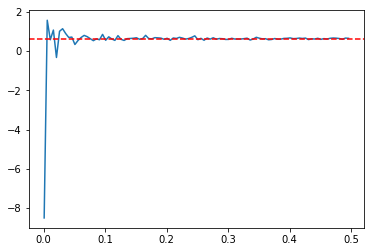

In [55]:
plt.plot(bump_sizes, variances)
plt.axhline(y=analytic_delta, color='r', linestyle='--', label = 'Analytic Mean')
plt.show()

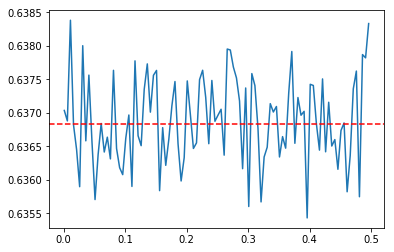

In [58]:
# Compute delta using same samples, and various bump sizes
variances = []
for i in range(0, len(bump_sizes)):
    W = np.random.standard_normal(10**6)
        
    f_pos = f_W(r, sigma, T, S_0 + bump_sizes[i], K, W)
    f_neg = f_W(r, sigma, T, S_0 - bump_sizes[i], K, W) 
        
    variances.append((1.0/(2.0*bump_sizes[i]))*(np.mean(f_pos) - np.mean(f_neg)))

plt.plot(bump_sizes, variances)
plt.axhline(y=analytic_delta, color='r', linestyle='--', label = 'Analytic Mean')
plt.show()

In [56]:
# Compute vega using two samples, and various bump sizes
variances = []
for i in range(0, len(bump_sizes)):
    W_1 = np.random.standard_normal(10**6)
    W_2 = np.random.standard_normal(10**6)
        
    f_pos = f_W(r, sigma + bump_sizes[i], T, S_0 , K, W_1)
    f_neg = f_W(r, sigma - bump_sizes[i], T, S_0, K, W_2) 
        
    variances.append((1.0/(2.0*bump_sizes[i]))*(np.mean(f_pos) - np.mean(f_neg)))

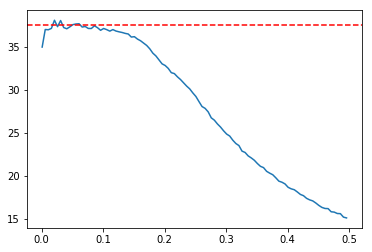

In [57]:
plt.plot(bump_sizes, variances)
plt.axhline(y=analytic_vega, color='r', linestyle='--', label = 'Analytic Mean')
plt.show()

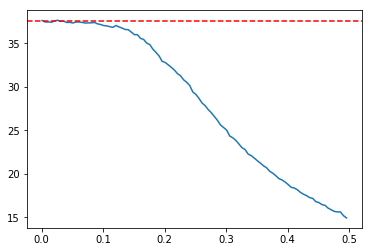

In [59]:
# Compute vega using same sample, and various bump sizes
variances = []
for i in range(0, len(bump_sizes)):
    W = np.random.standard_normal(10**6)
        
    f_pos = f_W(r, sigma + bump_sizes[i], T, S_0 , K, W)
    f_neg = f_W(r, sigma - bump_sizes[i], T, S_0, K, W) 
        
    variances.append((1.0/(2.0*bump_sizes[i]))*(np.mean(f_pos) - np.mean(f_neg)))

plt.plot(bump_sizes, variances)
plt.axhline(y=analytic_vega, color='r', linestyle='--', label = 'Analytic Mean')
plt.show()

In [ ]:
# Re-do the calculation using the IPA (“pathwise” sensitivity) method.